# This exercise is an attempt to look at whether or not neurons that are close together in space also connect to each other.

In [1]:
from fafbseg import flywire

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize


import sys
import itertools
from itertools import product

### Choose a location in FlyWire! I’d say choose something from something you’ve been working in (e.g. AL, LH, or some area where a bunch of neurons in a hemilineage run together. If you have other suggestions or ideas to make this analysis more interesting, please say so!)

In [2]:
start_loc = np.asarray([110022, 66768, 1879])

### Find and display all neurons within a 400 nm side square in the same Z coordinate plane but centred at your starting location. For example, if I start at x,y,z of 1600,1200,400, I want everything from X: 1400-1800, Y: 1000-1400, Z:400.


In [53]:
def get_roots_400sq(start_loc):
    all_locs_x = np.arange(start_loc[0]-200, start_loc[0]+500, 2)
    all_locs_y = np.arange(start_loc[1]-200, start_loc[1]+500, 2)
    all_combos = []
    for x in all_locs_x:
        for y in all_locs_y:
            all_combos.append([x,y,start_loc[2]])
    all_svs = flywire.locs_to_supervoxels(all_combos)
    #locs_to_segments(all_combos)
    unique_svs = np.unique(all_svs)
    all_roots = flywire.supervoxels_to_roots(list(unique_svs), retry=False)
    unique_roots = np.unique(all_roots)
    print(flywire.encode_url(unique_roots, coords=start_loc))
    return unique_roots

In [54]:
unique_roots = get_roots_400sq(start_loc)

https://ngl.flywire.ai/?json_url=https://globalv1.flywire-daf.com/nglstate/5176084421148672


In [5]:
#unique_roots = [720575940614904437,720575940639160272,720575940658812545,720575940610655773,720575940616544546,720575940632000994,720575940617537147,720575940619309958,720575940613711645,720575940623952205,720575940604340070,720575940620320895,720575940603628972,720575940610506097,720575940624548133,720575940633134645,720575940609108526,720575940632962716,720575940615330902,720575940621968055,720575940608852578,720575940639769307,720575940630051147,720575940636600895,720575940630424121,720575940640331995]

In [6]:
#unique_roots = [720575940625119625,720575940620094633,720575940619414655,720575940606267403,720575940630374860,720575940621607093,720575940624977466,720575940636922702,720575940610851546,720575940636921678,720575940626043706,720575940625167390,720575940633500852,720575940633277364,720575940637480307,720575940622637575,720575940625990277,720575940625630212,720575940652558241,720575940624951689,720575940613063327,720575940634323448,720575940606267659,720575940632368992,720575940619007664,720575940620102988,720575940652728481,720575940638422480,720575940624959625,720575940638290048,720575940628908604]

https://ngl.flywire.ai/?json_url=https://globalv1.flywire-daf.com/nglstate/5790868724252672

### Get upstream and downstream connectivity of these neurons.

### Plot adjacency matrix for these neurons.


In [76]:
matrix = flywire.synapses.fetch_adjacency(unique_roots)

Fetching adjacency:   0%|          | 0/3 [00:00<?, ?it/s]

In [77]:
locs = [x for x in np.arange(0, matrix.shape[0])]
for loc in locs:
    matrix.at[matrix.index[loc], matrix.columns[loc]] = 0

<AxesSubplot:xlabel='target', ylabel='source'>

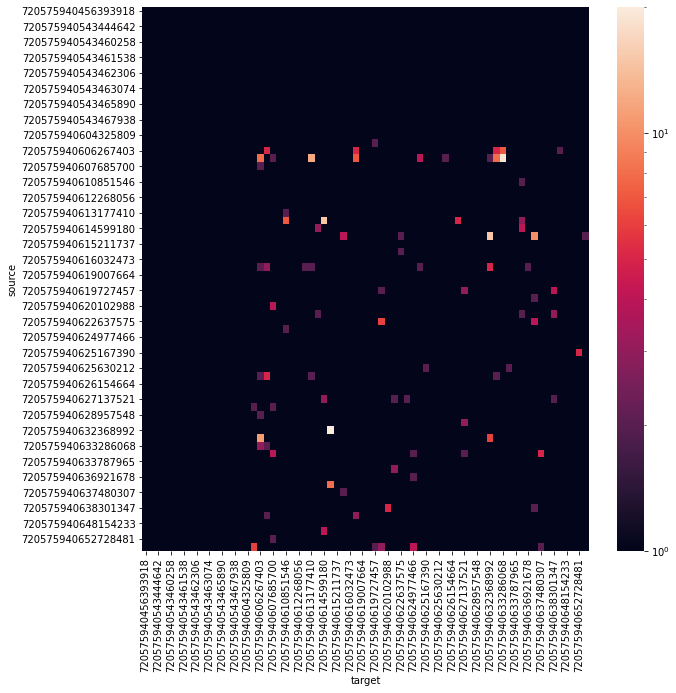

In [79]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(matrix, ax=ax, norm=LogNorm(vmin=1, clip=True))

### Note any patterns in the adjacent matrices. 

ok seems like ALLNs that are near eachother do not seem to interact - i'm actually surprised?


# This next exercise attempts to determine if unilateral RNs in the AL tend to cluster in space.


### Here are 5 unilateral RN IDs, some are ipsilateral and some are contralateral: 720575940620639002, 720575940607626453, 720575940621958596, 720575940633731901, 720575940637817021, and here are 5 bilateral RN IDs: 720575940610763762, 720575940620360948, 720575940605326537, 720575940634057976, 720575940632766620. (Feel free to find your own favourites from the AL_bodies table, but the labelling on unilateral vs bilateral is not really existent).


### Select a location along each of the RNs (ideally where the z plane is perpendicular to the neuron)


uni IDs: <br>
720575940630630248 - 107397, 65432, 1040 <br>
720575940607626453 - 107508, 65613, 1040 <br>
720575940637817021 - 118044, 50176, 793 <br>
720575940620639002 - 106040, 59001, 1302 <br>
720575940621958596 - 155792, 68365, 653 <br>

bi IDs: <br>
720575940632766620 - 143295, 55540, 230 <br>
720575940620360948 - 143563, 71776, 760 <br>
720575940634057976 - 136831, 64645, 1306 <br>
720575940605326537 - 120791, 49889, 1048 <br>
720575940610763762 - 114834, 49826, 1127 <br>

### Find all neurons within a 200 nm radius sphere or 400 nm side length cube of the selected location for each RN. (Such that the location selected is in the centre of sphere/cube).


In [12]:
uni_start_locs = np.asarray([[107397, 65432, 1040], [107397, 65432, 1040], [118044, 50176, 793], [106040, 59001, 1302], [155792, 68365, 653]])
bi_start_locs = np.asarray([[155792, 68365, 653], [143563, 71776, 760], [136831, 64645, 1306], [120791, 49889, 1048], [114834, 49826, 1127]])

### Determine if those neurons are unilateral or bilateral (synapse location is probably the best metric for it).


In [80]:
pr = flywire.get_annotations("proofreading_status_public_v1")
    
def get_roots_400cube(start_loc):
    all_locs_x = np.arange(start_loc[0]-50, start_loc[0]+50, 2)
    all_locs_y = np.arange(start_loc[1]-50, start_loc[1]+50, 2)
    all_locs_z = np.arange(start_loc[2]-5, start_loc[2]+5, 1)
    all_combos = []
    for x in all_locs_x:
        for y in all_locs_y:
            for z in all_locs_z:
                all_combos.append([x,y,z])
    all_svs = flywire.locs_to_supervoxels(all_combos)
    unique_svs = np.unique(all_svs)
    all_roots = flywire.supervoxels_to_roots(list(unique_svs), retry=False)
    unique_roots = np.unique(all_roots)
    #unique_roots = unique_roots[np.isin(unique_roots, pr.pt_root_id)]
    print(flywire.encode_url(unique_roots, coords=start_loc))
    return unique_roots

In [81]:
[uni0, uni1, uni2, uni3, uni4] = [get_roots_400cube(i) for i in uni_start_locs]
[bi0, bi1, bi2, bi3, bi4] = [get_roots_400cube(i) for i in bi_start_locs]

https://ngl.flywire.ai/?json_url=https://globalv1.flywire-daf.com/nglstate/5678505803120640
https://ngl.flywire.ai/?json_url=https://globalv1.flywire-daf.com/nglstate/5115555849699328
https://ngl.flywire.ai/?json_url=https://globalv1.flywire-daf.com/nglstate/5108836591468544
https://ngl.flywire.ai/?json_url=https://globalv1.flywire-daf.com/nglstate/5020023445782528
https://ngl.flywire.ai/?json_url=https://globalv1.flywire-daf.com/nglstate/6401824013680640
https://ngl.flywire.ai/?json_url=https://globalv1.flywire-daf.com/nglstate/4703001558122496
https://ngl.flywire.ai/?json_url=https://globalv1.flywire-daf.com/nglstate/4544126775197696
https://ngl.flywire.ai/?json_url=https://globalv1.flywire-daf.com/nglstate/5362673638178816
https://ngl.flywire.ai/?json_url=https://globalv1.flywire-daf.com/nglstate/5284106556407808
https://ngl.flywire.ai/?json_url=https://globalv1.flywire-daf.com/nglstate/6562146334801920


### Are neurons near the unilateral RNs more likely to be unilateral than those near the bilateral neurons?

In [82]:
cols = ['id', 'type', 'uni_count', 'bi_count']
counter_table = pd.DataFrame(columns = cols)
for roots in [uni0, uni1, uni2, uni3, uni4]:
    bi_count = 0
    uni_count = 0
    for i in roots:
        all_syns = flywire.synapses.fetch_synapses(i)
        left_syns_count = all_syns[all_syns.pre_x<530000].shape[0]
        right_syns_count = all_syns[all_syns.pre_x>530000].shape[0]
        all_syns_count = all_syns.shape[0]
        if left_syns_count>all_syns_count*.15 and right_syns_count>all_syns_count*.15:
            bi_count += 1
        else:
            uni_count += 1
    new_row = pd.DataFrame([[i, 'uni', uni_count, bi_count]], columns=cols)
    counter_table = pd.concat([counter_table, new_row])
                                
for roots in [bi0, bi1, bi2, bi3, bi4]:
    bi_count = 0
    uni_count = 0
    for i in roots:
        all_syns = flywire.synapses.fetch_synapses(i)
        left_syns_count = all_syns[all_syns.pre_x<530000].shape[0]
        right_syns_count = all_syns[all_syns.pre_x>530000].shape[0]
        all_syns_count = all_syns.shape[0]
        if left_syns_count>all_syns_count*.15 and right_syns_count>all_syns_count*.15:
            bi_count += 1
        else:
            uni_count += 1
    new_row = pd.DataFrame([[i, 'bi', uni_count, bi_count]], columns=cols)
    counter_table = pd.concat([counter_table, new_row])

In [83]:
counter_table

,id,type,uni_count,bi_count
0,720575940635724144,uni,9,0
0,720575940635724144,uni,9,0
0,720575940637817021,uni,9,3
0,720575940658539905,uni,9,4
0,720575940642402720,uni,12,1
0,720575940642402720,bi,12,1
0,720575940632933216,bi,9,2
0,720575940634057976,bi,2,6
0,720575940636900159,bi,9,4
0,720575940636900159,bi,6,2
